In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Load dataset
df=pd.read_csv('/content/housing.csv')
df.isnull().sum()

,0
housing_median_age,0
total_rooms,0
population,0
households,0
median_house_value,0


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop(['median_house_value'],axis='columns'))
scaled_y = sy.fit_transform(df['median_house_value'].values.reshape(df.shape[0],1))
scaled_X

array([[0.78431373, 0.02233074, 0.00894083, 0.02055583],
       [0.39215686, 0.18050257, 0.0672104 , 0.18697583],
       [1.        , 0.03726029, 0.01381765, 0.02894261],
       ...,
       [0.31372549, 0.05727657, 0.0281398 , 0.07104095],
       [0.33333333, 0.04725571, 0.02068444, 0.05722743],
       [0.29411765, 0.07078183, 0.03879032, 0.08699227]])

In [ ]:
scaled_y

array([[0.90226638],
       [0.70824656],
       [0.69505074],
       ...,
       [0.15938285],
       [0.14371281],
       [0.15340349]])

In [ ]:
#Reshaping 2D array to 1D
scaled_y=scaled_y.reshape(scaled_y.shape[0])
scaled_y

array([0.90226638, 0.70824656, 0.69505074, ..., 0.15938285, 0.14371281,
       0.15340349])

MINI BATCH GRADIENT DESCENT

In [ ]:
scaled_X.shape[0]

20640

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 number_of_features = X.shape[1]
 # numpy array with 1 row and columns equal to number of features.

 # our case number_of_features = 2 (area, bedroom)
 w = np.ones(shape=(number_of_features),dtype = int)
 b = 0
 total_samples = X.shape[0] # number of rows in X

 cost_list = []
 epoch_list = []

 for i in range(epochs):
  y_predicted = np.dot(w, X.T) + b
  w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
  b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

  w = w - learning_rate * w_grad
  b = b - learning_rate * b_grad

  cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

  if i%10==0:
    cost_list.append(cost)
    epoch_list.append(i)

 return w, b, cost, cost_list, epoch_list

In [ ]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y, 50000, 0.01)

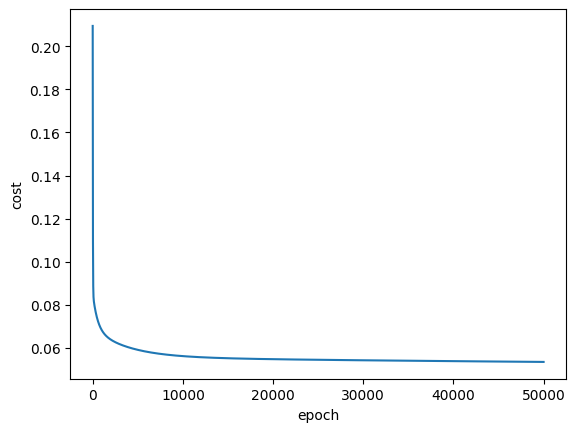

In [ ]:
#Now plot epoch vs cost graph to see how cost reduces as number of epoch increases
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(area, bedrooms, total, population,w,b):
  scaled_X = sx.transform([[area, bedrooms, total, population]])[0]
  scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

In [ ]:
column_averages = df.mean()
column_averages

,0
housing_median_age,28.639486
total_rooms,2635.763081
population,1425.476744
households,499.539680
median_house_value,206855.816909


In [ ]:
predict(2600,4,1,column_averages[3],w,b)

<ipython-input-77-ea1e63a8e892>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predict(2600,4,1,column_averages[3],w,b)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3978036.561854209

In [ ]:
predict(1000,2,1,499.539680,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1619598.5148492048

In [ ]:
predict(1500,3,1,1,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2356614.5786729

In [ ]:
import random
random.randint(0,6)

3

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate =0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b
    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y-y_predicted) # MSE (Mean Squared Error)

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [ ]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.99781482, 0.99977562, 0.99985239, 0.99970804]),
 -0.0032320586957706354,
 0.0725389161633643)

In [ ]:
w , b

(array([ 0.15499834,  0.90236673, -0.20627478, -0.15783587]),
 0.2722950815023028)

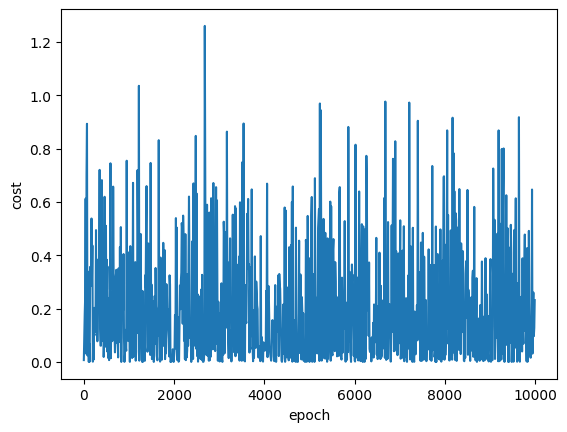

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
predict(2600,4,1,1,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


24675529.270542845

In [ ]:
predict(1000,2,1,1,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9493004.776008645